To prevent the overfitting problem(reduce overfittin)
- Post Prunning (apply for smaller dataset): 
    Construct complete DT then after that start cutting and prunning
- Pre Prunning (Hyperparameter tunning while constructing DT):  
    while constructing the DT we can play with somae parameter(Hyperparameter)


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
%matplotlib inline

In [7]:
# load iris data
iris = load_iris()

In [8]:
# indepent and dependent
# independent variables and dependent variable
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris['target']

In [9]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state= 42)

TO apply DT we don't need to standarization or any other kind of NOrmalization. With the help of DT we can directly apply algorithm

# Post Prunning

In [10]:
# Post Prunning
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=2)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]\nclass = versicolor'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]\nclass = versicolor'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.206\nsamples = 43\nvalue = [0, 5, 38]\nclass = virginica')]

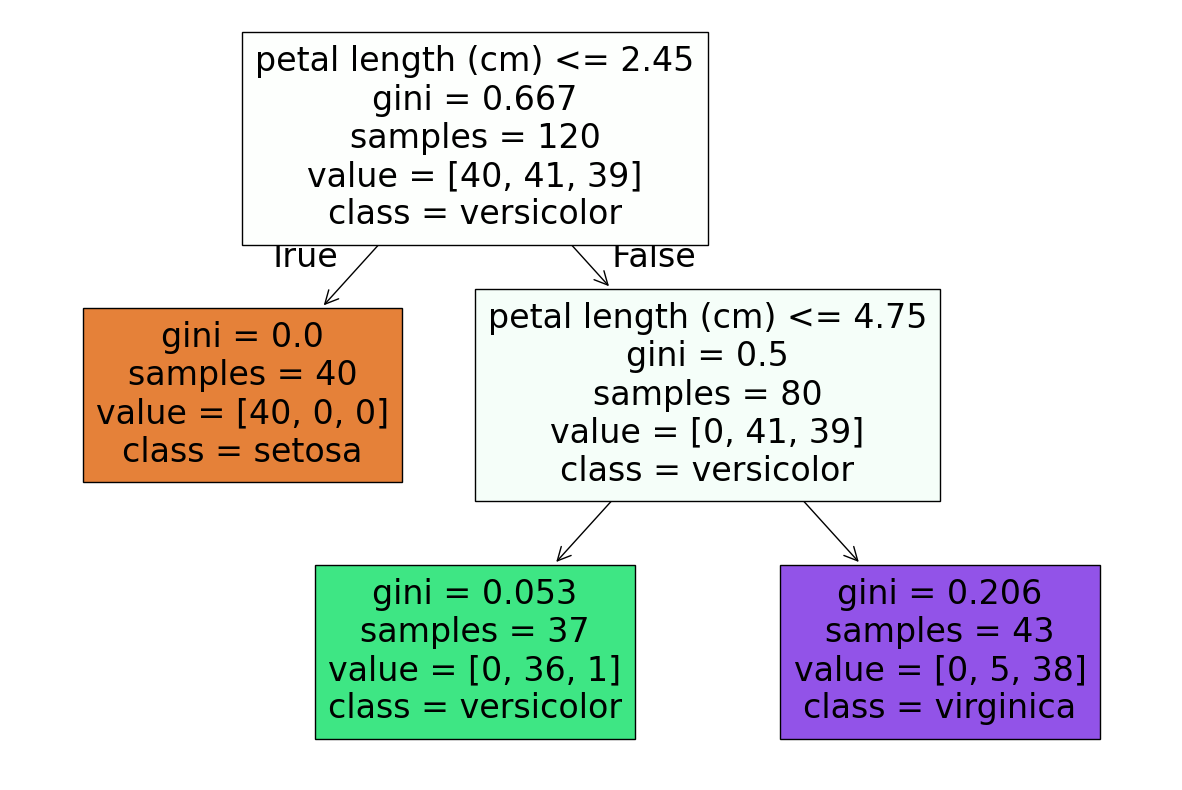

In [11]:
# visualize decision tree
# visualize the DT
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)

In [12]:
# prediction
y_pred = classifier.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_pred,y_test)
print(cm)
print(classification_report(y_pred, y_test))

[[10  0  0]
 [ 0  8  0]
 [ 0  1 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      1.00      0.94         8
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# Decision Tree Classifier Prepruning and Hyperparameter Tuning

In [14]:
param= {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : [1,2,3,4,5],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [15]:
# using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
grid = GridSearchCV(model, param_grid=param , cv=5, scoring="accuracy")

In [17]:
# to stop warnings
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [19]:
print(grid.best_score_)

0.95


In [21]:
grid.best_params_

{'criterion': 'log_loss',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [22]:
# prediction
y_pred = grid.predict(X_test)


In [23]:
# preformance matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
